In [134]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

In [135]:
# read the csv file
data=pd.read_csv('Credit Card Customer Data.csv')

In [4]:
# check the head of data set
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
# check the tail of data set
data.tail(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [136]:
# check the shape
data.shape

(660, 7)

In [7]:
# check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
# find if there is any null values
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [428]:
# START OF UNIVARIATE ANALYSIS

In [10]:
# summary of data incl. 5 point summary of all numeric variables
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [11]:
# export describe outputs into excel
data.describe().to_excel('custsegment.xls')

<ipython-input-11-cea3f7dd160f>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.describe().to_excel('custsegment.xls')


In [ ]:
# Find total number of contacts under different contact types

In [295]:
data['Total_visits_bank'].sum()

1586

In [296]:
data['Total_visits_online'].sum()

1720

In [297]:
data['Total_calls_made'].sum()

2365

In [ ]:
# Fina how many customers didn't use online service

In [300]:
data[data['Total_visits_online']==0].count()

Sl_No                  144
Customer Key           144
Avg_Credit_Limit       144
Total_Credit_Cards     144
Total_visits_bank      144
Total_visits_online    144
Total_calls_made       144
dtype: int64

In [10]:
# function for combined boxplot and histplot
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [431]:
# find central tendency and dispersions for numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


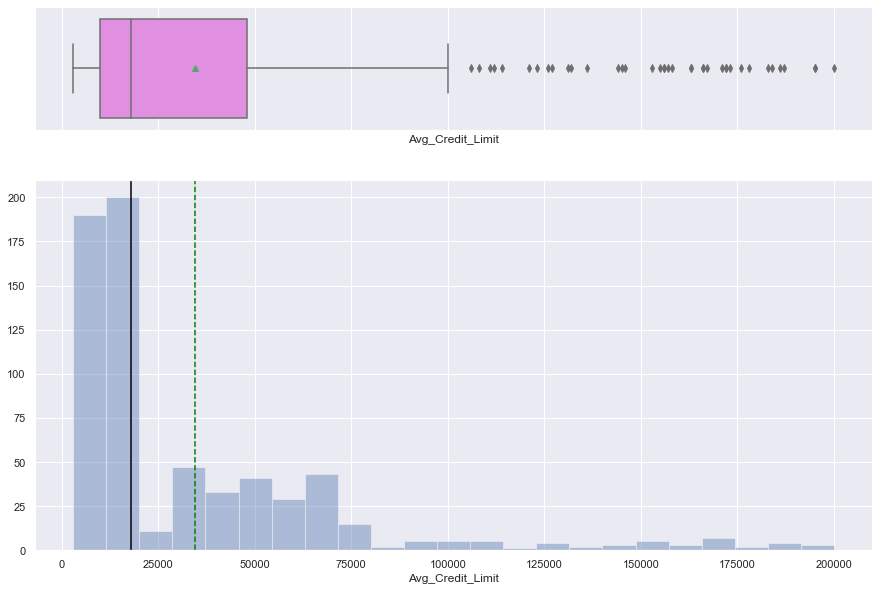

In [11]:
histogram_boxplot(data["Avg_Credit_Limit"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


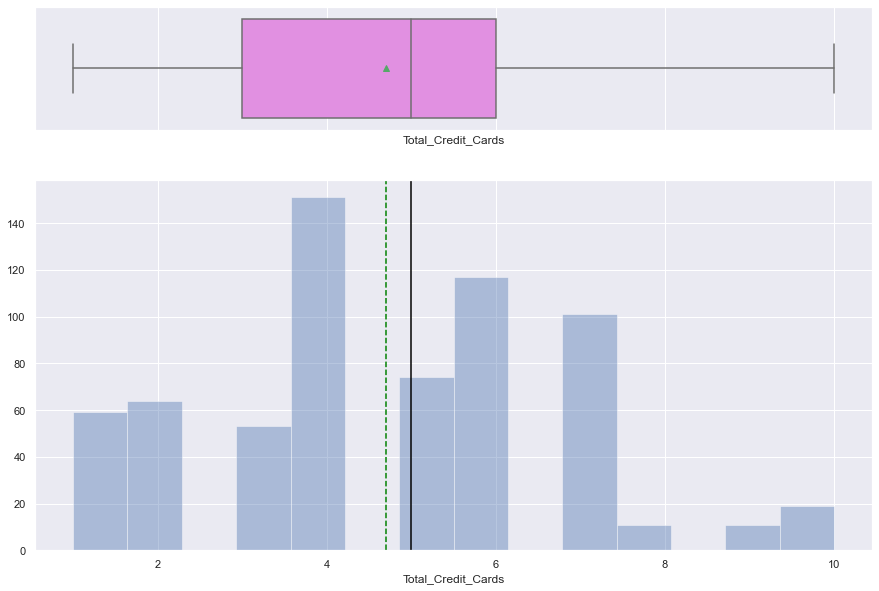

In [12]:
histogram_boxplot(data["Total_Credit_Cards"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


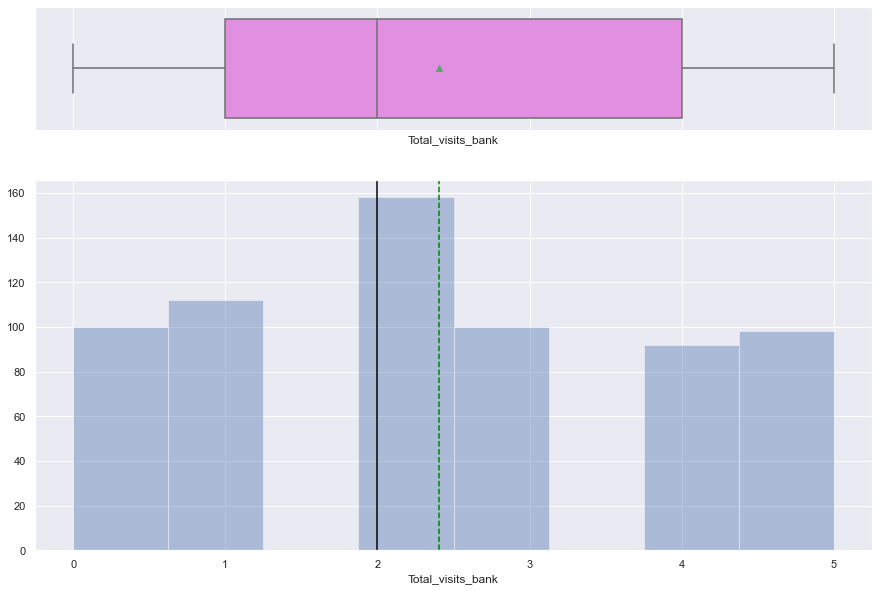

In [13]:
histogram_boxplot(data["Total_visits_bank"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


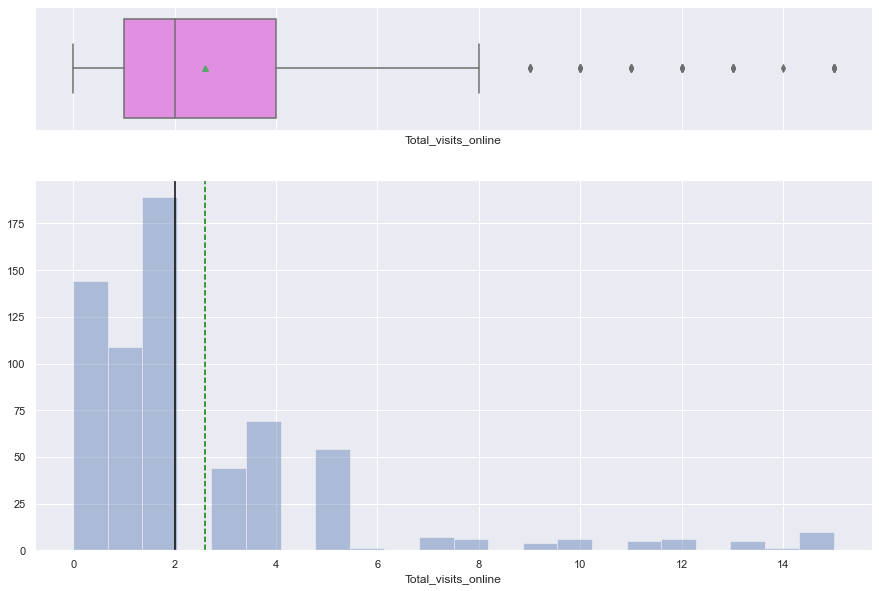

In [14]:
histogram_boxplot(data["Total_visits_online"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


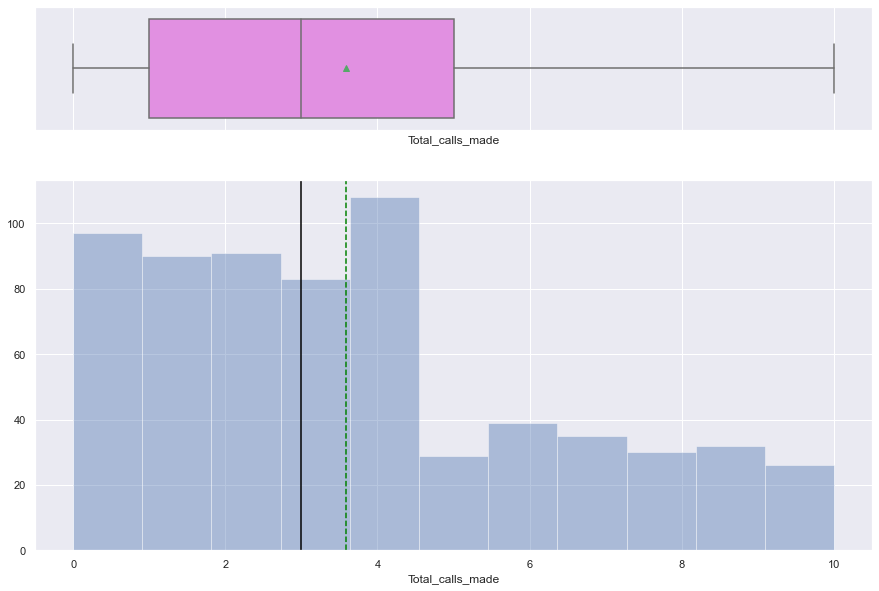

In [15]:
histogram_boxplot(data["Total_calls_made"])

In [109]:
# Start of multivariate analysis

In [12]:
data_ml=data.iloc[:,2:]

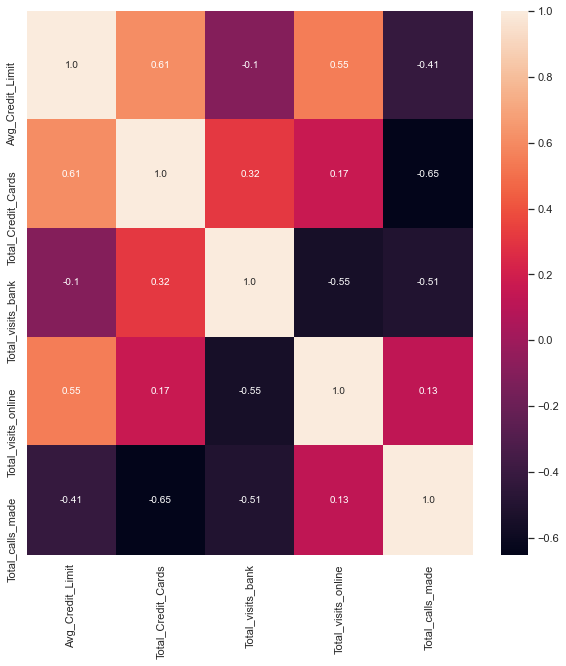

In [14]:

plt.figure(figsize=(10,10))
sns.heatmap(data_ml.corr(), annot=True, fmt=".2")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


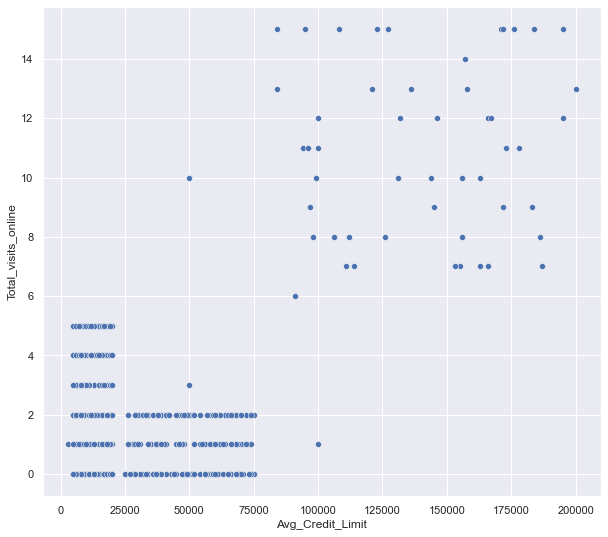

In [20]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Avg_Credit_Limit'],data['Total_visits_online']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


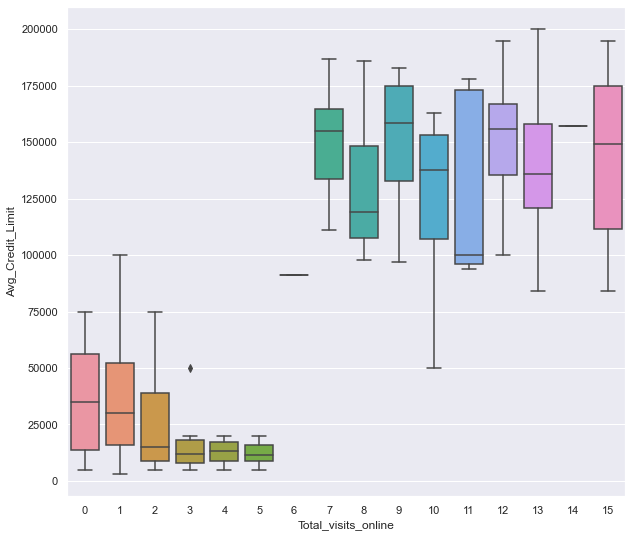

In [24]:
plt.figure(figsize=(10,9))

sns.boxplot(data['Total_visits_online'],data['Avg_Credit_Limit']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


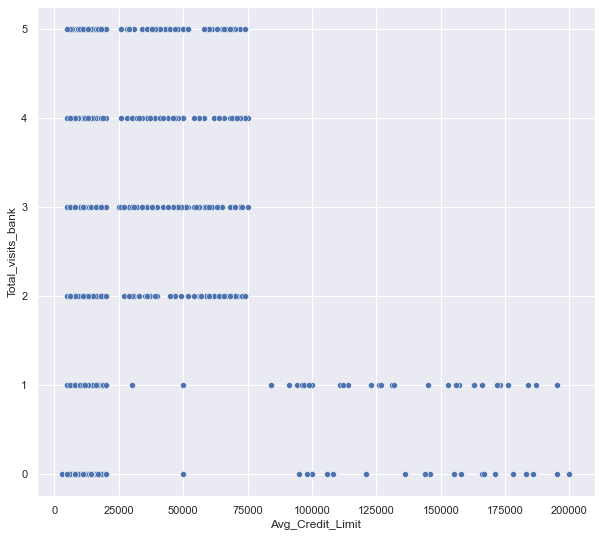

In [27]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Avg_Credit_Limit'],data['Total_visits_bank']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


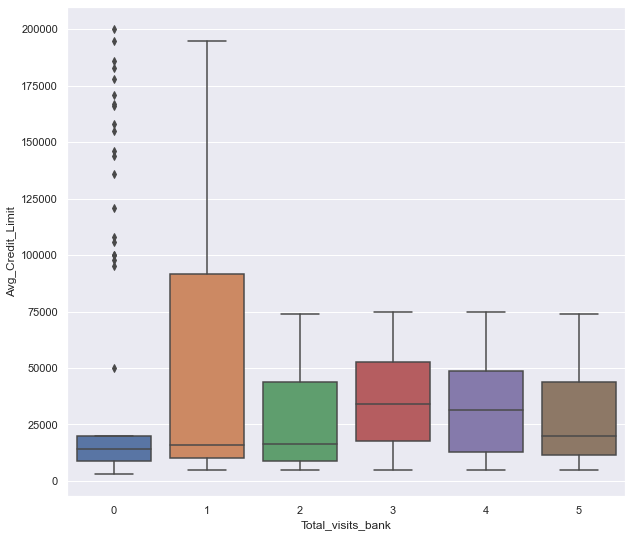

In [26]:
plt.figure(figsize=(10,9))

sns.boxplot(data['Total_visits_bank'],data['Avg_Credit_Limit']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


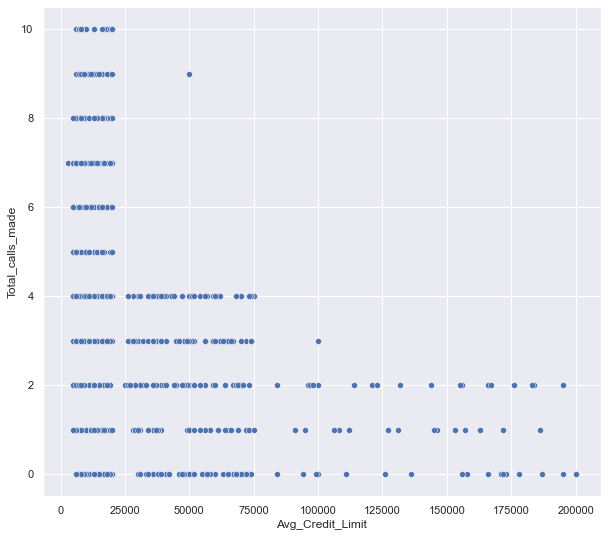

In [28]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Avg_Credit_Limit'],data['Total_calls_made']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


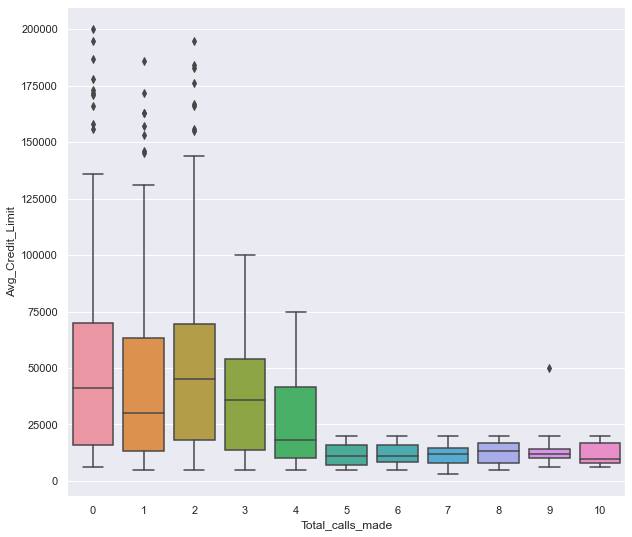

In [30]:
plt.figure(figsize=(10,9))

sns.boxplot(data['Total_calls_made'],data['Avg_Credit_Limit']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


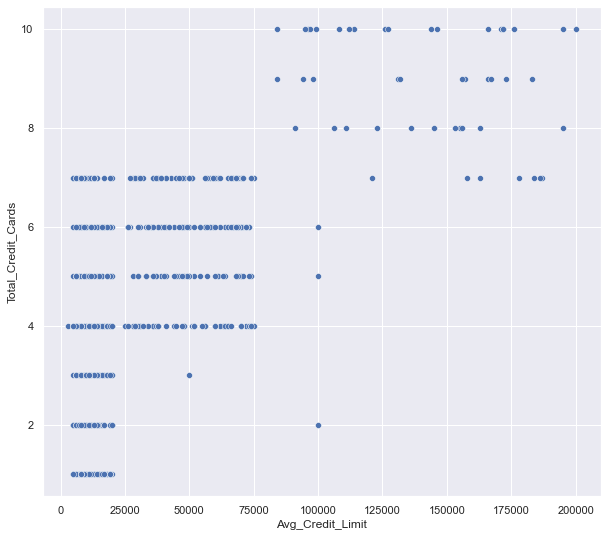

In [25]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Avg_Credit_Limit'],data['Total_Credit_Cards']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


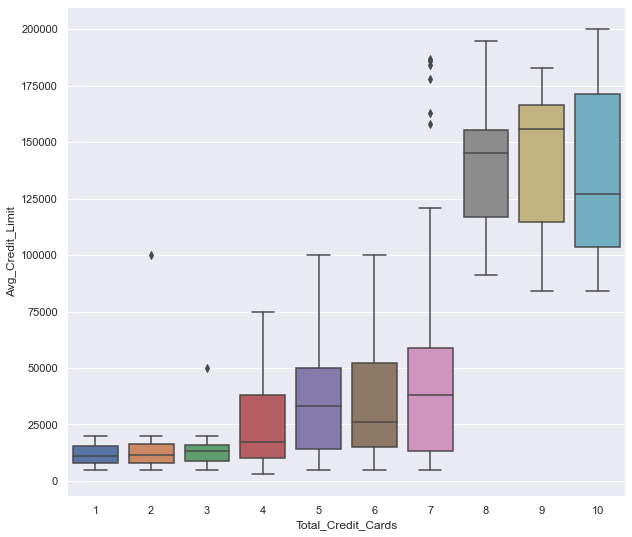

In [23]:
plt.figure(figsize=(10,9))

sns.boxplot(data['Total_Credit_Cards'],data['Avg_Credit_Limit']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


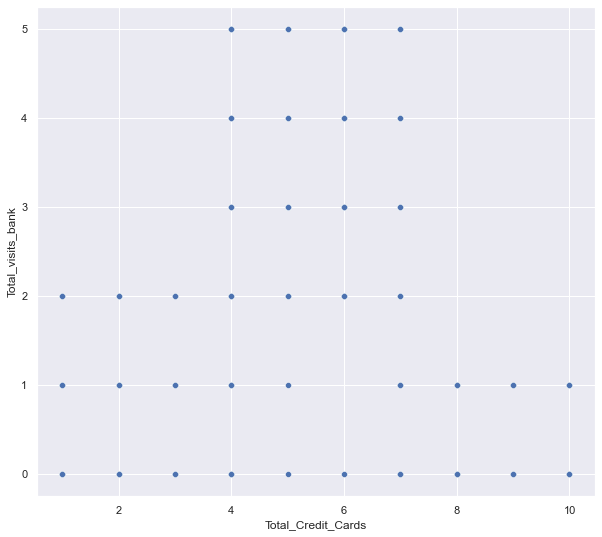

In [31]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_Credit_Cards'],data['Total_visits_bank']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


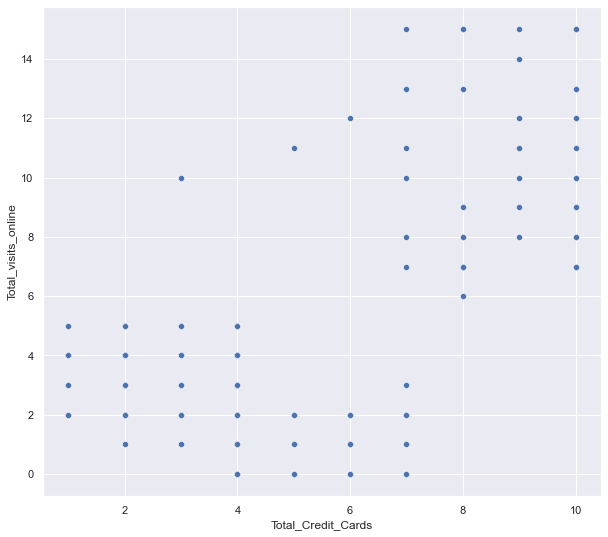

In [32]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_Credit_Cards'],data['Total_visits_online']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


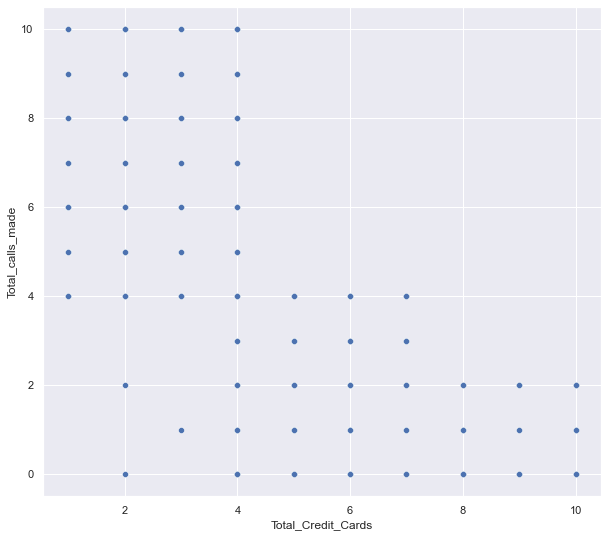

In [33]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_Credit_Cards'],data['Total_calls_made']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


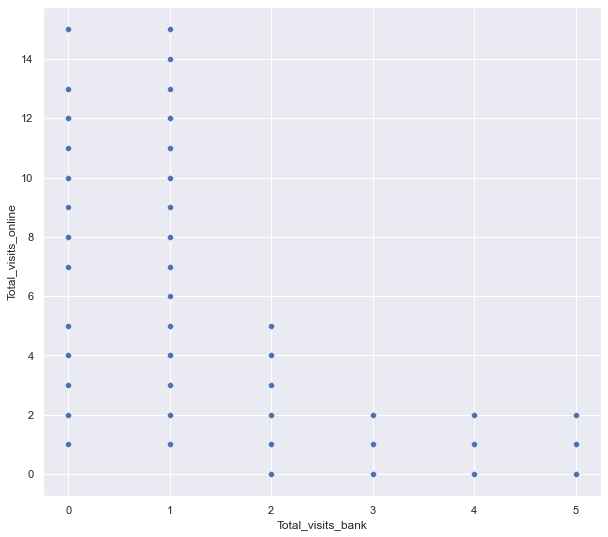

In [34]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_visits_bank'],data['Total_visits_online']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


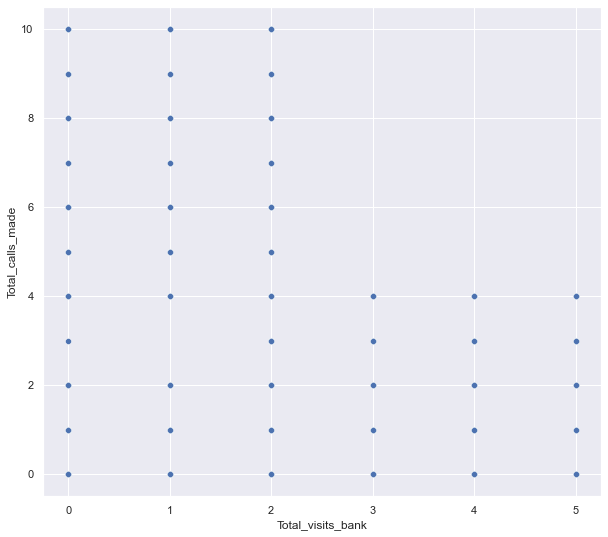

In [35]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_visits_bank'],data['Total_calls_made']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


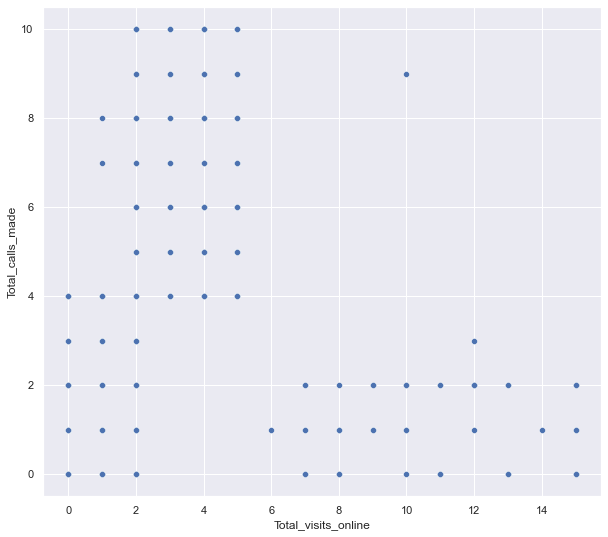

In [36]:
plt.figure(figsize=(10,9))
sns.scatterplot(data['Total_visits_online'],data['Total_calls_made']);
plt.show()

In [16]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
#from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

In [177]:
data_ml=data.iloc[:,2:]

In [45]:
data_ml.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
# find and remove duplicates

In [53]:
data_ml.duplicated().sum()

11

In [47]:
data_ml.shape

(660, 5)

In [138]:
data_ml[data_ml.duplicated(keep=False)].sort_values('Avg_Credit_Limit')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
310,5000,4,5,0,1
395,5000,4,5,0,1
56,6000,1,0,2,5
175,6000,1,0,2,5
385,8000,7,4,2,0
334,8000,7,4,2,0
17,8000,2,0,3,4
215,8000,4,0,4,7
162,8000,2,0,3,4
29,8000,4,0,4,7


In [178]:
data_ml = data_ml[(~data_ml.duplicated())]

In [170]:
data_ml.shape

(649, 5)

In [179]:
# Scaling the dataset before clustering
scaler=StandardScaler()

data_ml_scaled=scaler.fit_transform(data_ml) 

In [180]:
# Creating a dataframe of the above results
data_ml_scaled=pd.DataFrame(data_ml_scaled,columns=data_ml.columns)

In [ ]:
# k-means clusterin

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.007896349270688
Number of Clusters: 2 	Average Distortion: 1.4576197022077821
Number of Clusters: 3 	Average Distortion: 1.1434401208195095
Number of Clusters: 4 	Average Distortion: 1.0435538595477063
Number of Clusters: 5 	Average Distortion: 0.9874593481133525
Number of Clusters: 6 	Average Distortion: 0.9405015907509096
Number of Clusters: 7 	Average Distortion: 0.9073113394752733
Number of Clusters: 8 	Average Distortion: 0.8862340639189576


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

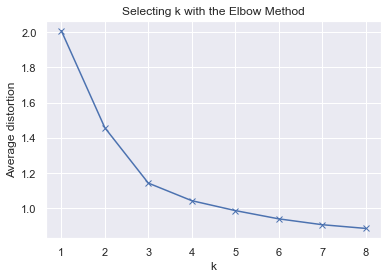

In [181]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_ml_scaled)
    prediction=model.predict(data_ml_scaled)
    distortion=sum(np.min(cdist(data_ml_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_ml_scaled.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Number of Clusters: 2 Silhouette Score is 0.41800025566689647)
Number of Clusters: 3 Silhouette Score is 0.516281010855363)
Number of Clusters: 4 Silhouette Score is 0.3570238219413198)
Number of Clusters: 5 Silhouette Score is 0.2722848313346344)
Number of Clusters: 6 Silhouette Score is 0.2571507730386939)
Number of Clusters: 7 Silhouette Score is 0.2502545988014861)
Number of Clusters: 8 Silhouette Score is 0.2270648332378653)


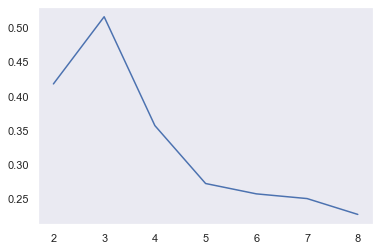

In [182]:
sil_score = []
cluster_list = list(range(2,9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data_ml_scaled))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(data_ml_scaled, preds)
    sil_score.append(score)
    print("Number of Clusters: {} Silhouette Score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

In [183]:
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_ml_scaled)

KMeans(n_clusters=3, random_state=0)

In [184]:
data_ml_scaled['K_means_segments'] = kmeans.labels_
data_ml['K_means_segments'] = kmeans.labels_

In [185]:
data_ml_profile = data_ml.groupby('K_means_segments').mean()

In [186]:
data_ml_profile['count_in_each_segments'] = data_ml.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [187]:
# lets display cluster profile
data_ml_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


In [188]:
# lets display cluster profile
data_ml_profile.style.highlight_min(color = 'red', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,141040.000000,8.740000,0.600000,10.900000,1.080000,50
1,34071.428571,5.518519,3.484127,0.981481,1.992063,378
2,12239.819005,2.411765,0.945701,3.561086,6.891403,221


In [189]:
all_col = data_ml_scaled.select_dtypes(include=np.number).columns.tolist()


In [190]:
all_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made',
 'K_means_segments']

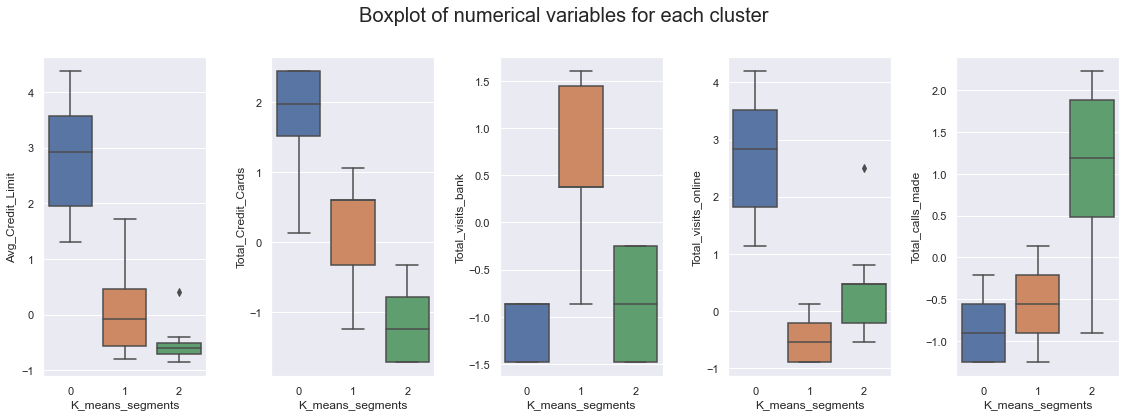

In [191]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml_scaled[all_col[counter]],x=data_ml_scaled['K_means_segments'])

    counter = counter+1

fig.tight_layout(pad=2.0)

In [ ]:
# prepare data

In [283]:
data_ml=data.iloc[:,2:]
data_ml = data_ml[(~data_ml.duplicated())]
scaler=StandardScaler()

data_ml_scaled=scaler.fit_transform(data_ml)
data_ml_scaled=pd.DataFrame(data_ml_scaled,columns=data_ml.columns)

In [284]:
# lets us take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_ml_scaled)

KMeans(n_clusters=4, random_state=0)

In [285]:
data_ml_scaled['K_means_segments'] = kmeans.labels_
data_ml['K_means_segments'] = kmeans.labels_

In [286]:
data_ml_profile = data_ml.groupby('K_means_segments').mean()

In [287]:
data_ml_profile['count_in_each_segments'] = data_ml.groupby('K_means_segments')['Avg_Credit_Limit'].count().values

In [288]:
# lets display cluster profile
data_ml_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,35857.142857,5.525510,2.479592,0.974490,2.056122,196
1,31832.432432,5.481081,4.513514,1.005405,1.940541,185
2,12233.944954,2.394495,0.940367,3.582569,6.944954,218
3,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [198]:
# lets display cluster profile
data_ml_profile.style.highlight_min(color = 'red', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,35857.142857,5.525510,2.479592,0.974490,2.056122,196
1,31832.432432,5.481081,4.513514,1.005405,1.940541,185
2,12233.944954,2.394495,0.940367,3.582569,6.944954,218
3,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [289]:
all_col = data_ml_scaled.select_dtypes(include=np.number).columns.tolist()


In [290]:
all_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made',
 'K_means_segments']

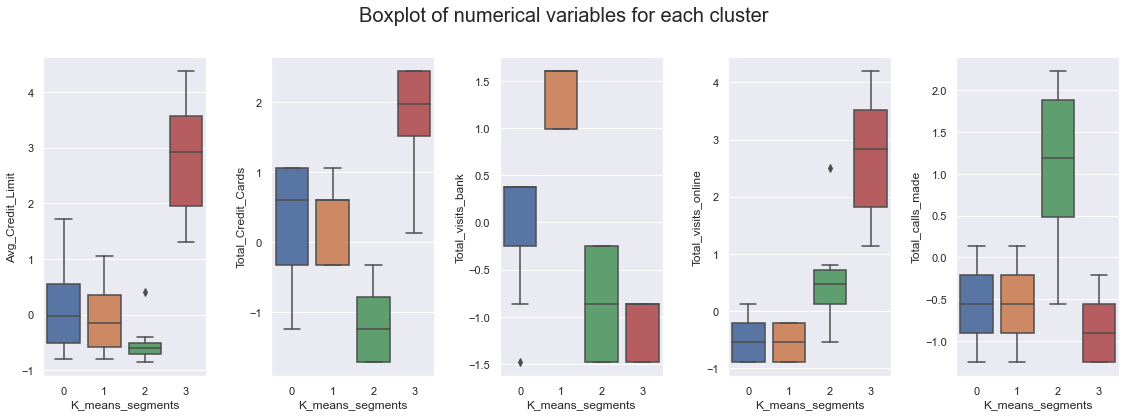

In [291]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml_scaled[all_col[counter]],x=data_ml_scaled['K_means_segments'])

    counter = counter+1

fig.tight_layout(pad=2.0)

In [ ]:
# 4 clusters provide separate clusters and more info compared to 3 clusters

In [ ]:
# hierarchical clustering

In [202]:
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
#from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [205]:
data_ml.shape

(649, 5)

In [214]:
data_ml=data.iloc[:,2:]
data_ml = data_ml[(~data_ml.duplicated())]
scaler=StandardScaler()

data_ml_scaled=scaler.fit_transform(data_ml)
data_ml_scaled=pd.DataFrame(data_ml_scaled,columns=data_ml.columns)

In [206]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_ml_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(data_ml_scaled))
        print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophent correlation for distance metrics euclidean and linkage method single is 0.7395135051413775
Cophent correlation for distance metrics euclidean and linkage method complete is 0.8794736468795109
Cophent correlation for distance metrics euclidean and linkage method average is 0.8974425535306298
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.8551098644586315
Cophent correlation for distance metrics chebyshev and linkage method single is 0.7379112982920528
Cophent correlation for distance metrics chebyshev and linkage method complete is 0.8578617029322211
Cophent correlation for distance metrics chebyshev and linkage method average is 0.8960370054789858
Cophent correlation for distance metrics chebyshev and linkage method weighted is 0.893309534644998
Cophent correlation for distance metrics mahalanobis and linkage method single is 0.7054746377393305
Cophent correlation for distance metrics mahalanobis and linkage method complete is 0.616502806551

In [207]:
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Highest cophenet correlation is 0.8974425535306298, which is obtinaed with euclidean distance metric and average linkage method


In [208]:
linkage_methods = ['single', 'complete', 'average','median','ward', 'weighted','centroid']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(data_ml_scaled, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(data_ml_scaled))
    print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = 'euclidean'
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, which is obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkage method single is 0.7395135051413775
Cophent correlation for distance metrics euclidean and linkage method complete is 0.8794736468795109
Cophent correlation for distance metrics euclidean and linkage method average is 0.8974425535306298
Cophent correlation for distance metrics euclidean and linkage method median is 0.8806884020604272
Cophent correlation for distance metrics euclidean and linkage method ward is 0.7425813590948763
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.8551098644586315
Cophent correlation for distance metrics euclidean and linkage method centroid is 0.894471288720818
**************************************************************************************************************
Highest cophenet correlation is 0.8974425535306298, which is obtinaed with euclidean distance metric and average linkage method


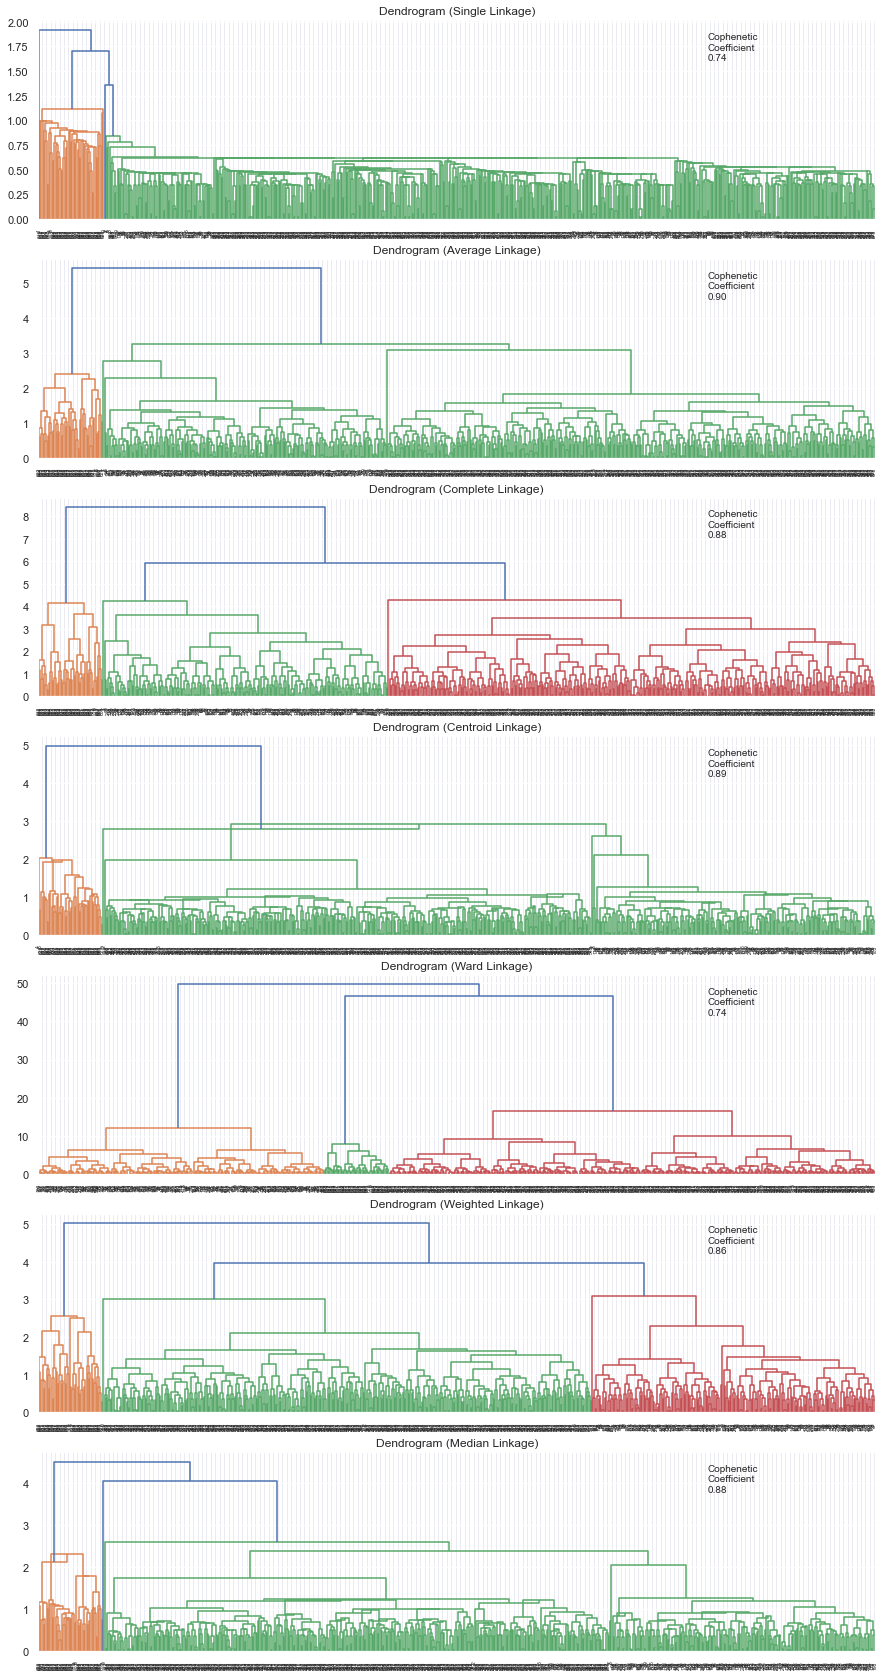

In [209]:
# List of all linkage methods to check
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted',
          'median']

# Calculate the pairwise distance form the dataset to be used in the cophenetic correlation calculation
#pw_distance = pdist(credit_scaled)

# Create lists to save results of coph calculation
compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, method in enumerate(methods):
    
    Z = linkage(data_ml_scaled, metric='euclidean', method=method)

    dendrogram(Z, ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(data_ml_scaled))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])


In [211]:
# Create and print dataframe to compare Cophenetic Coefficient for each linkage
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739514
1,average,0.897443
2,complete,0.879474
3,centroid,0.894471
4,ward,0.742581
5,weighted,0.855110
6,median,0.880688


In [212]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'weighted']

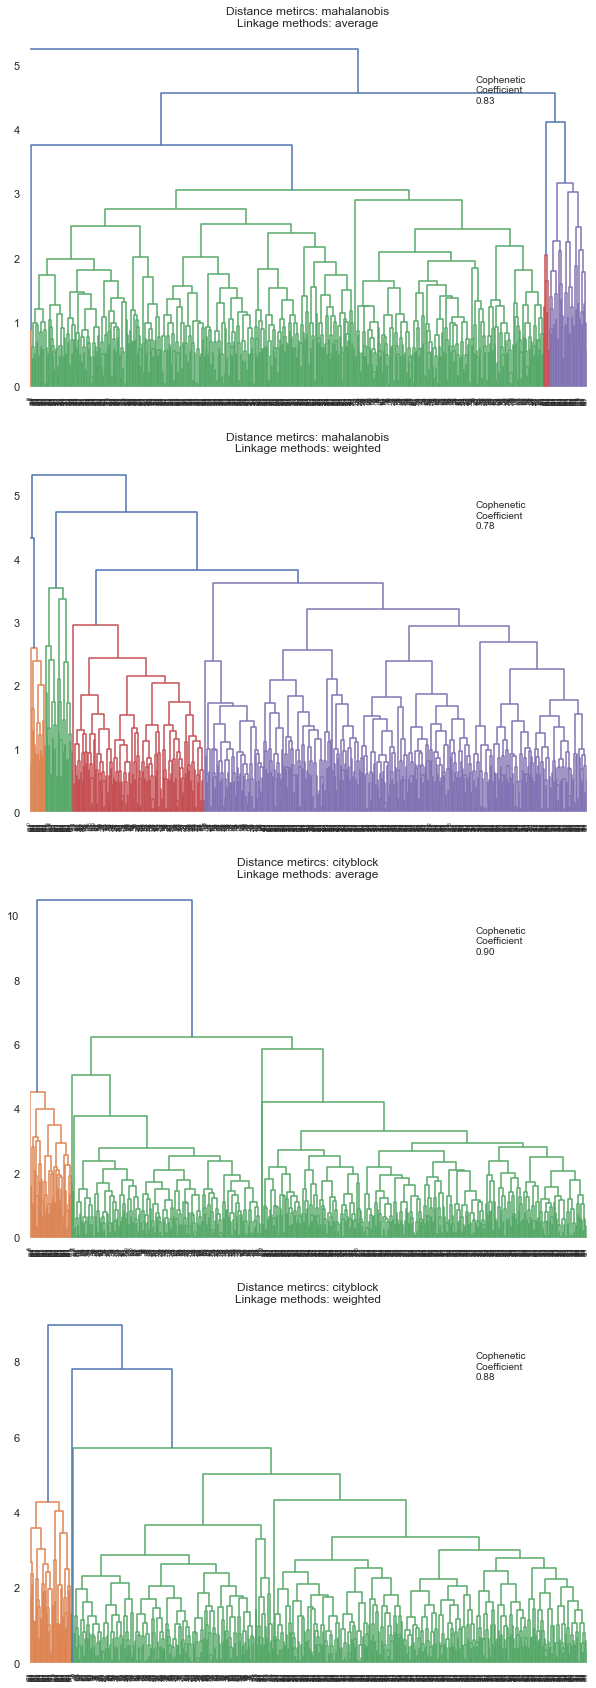

In [213]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_ml_scaled, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(data_ml_scaled))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

In [292]:
distance_metrics = [ 'chebyshev']
linkage_methods = ['average']

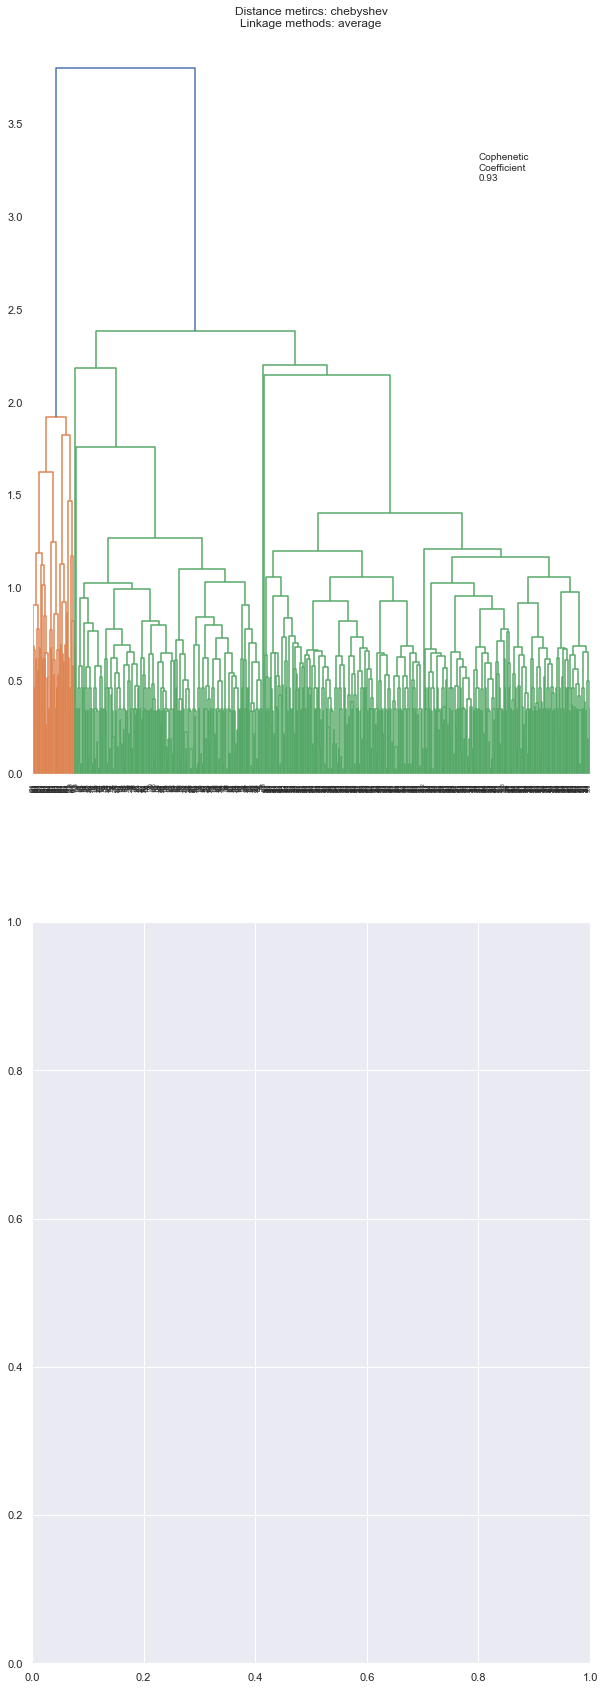

In [293]:
# Create a subplot image
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_ml_scaled, metric=dm, method=lm)
        dendrogram(Z,  ax=axs[i]);
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(data_ml_scaled))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metircs: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
       

In [ ]:
# Euclidean Ward provides good separate clusters

In [302]:
#Trying with K value as 3
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(data_ml_scaled)
data_ml_scaled['HC_Clusters'] = HCmodel.labels_

In [303]:
data_ml['HC_Clusters'] = HCmodel.labels_

In [304]:
cluster_profile =data_ml.groupby('HC_Clusters').mean()

In [305]:
cluster_profile['count_in_each_segments'] = data_ml.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [306]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33902.887139,5.503937,3.467192,0.989501,2.000000,0.485564,381
1,12233.944954,2.394495,0.940367,3.582569,6.944954,2.000000,218
2,141040.000000,8.740000,0.600000,10.900000,1.080000,3.000000,50


In [307]:
# lets display cluster profile
cluster_profile.style.highlight_min(color = 'red', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33902.887139,5.503937,3.467192,0.989501,2.000000,0.485564,381
1,12233.944954,2.394495,0.940367,3.582569,6.944954,2.000000,218
2,141040.000000,8.740000,0.600000,10.900000,1.080000,3.000000,50


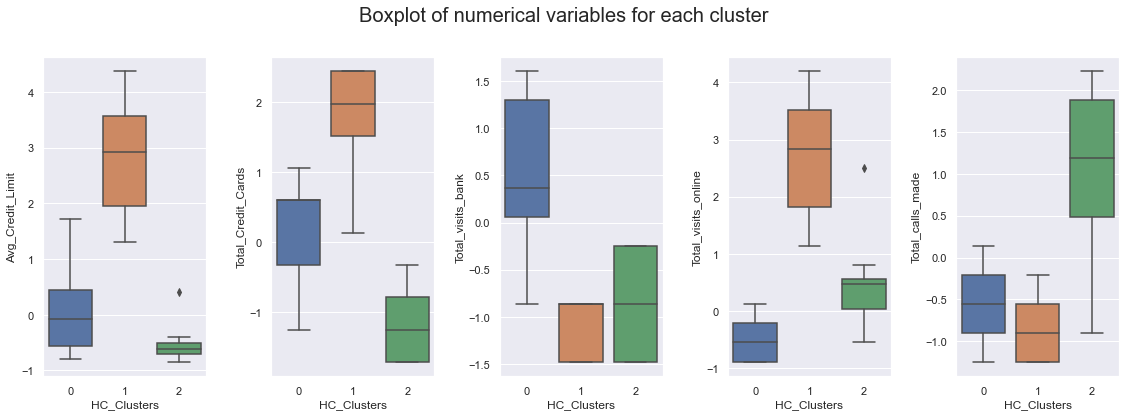

In [221]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml_scaled[all_col[counter]],x=data_ml_scaled['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

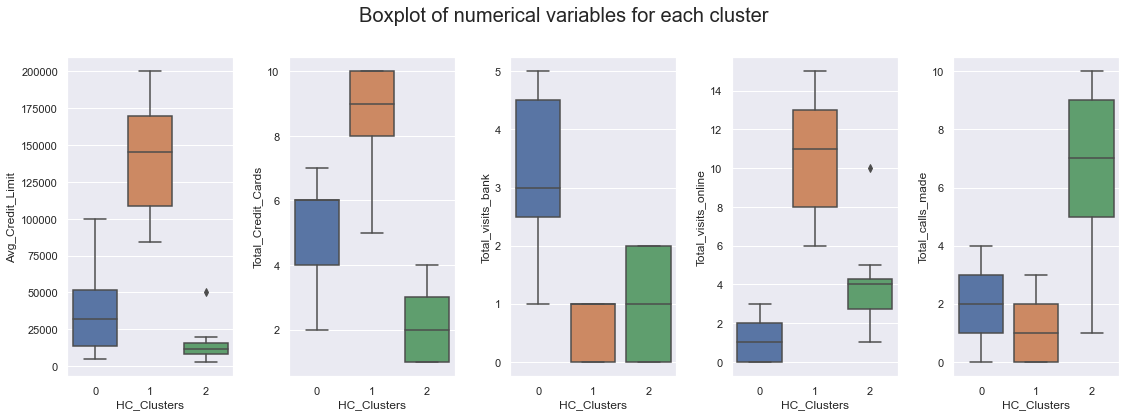

In [222]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml[all_col[counter]],x=data_ml['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

In [274]:
data_ml=data.iloc[:,2:]
data_ml = data_ml[(~data_ml.duplicated())]
scaler=StandardScaler()

data_ml_scaled=scaler.fit_transform(data_ml)
data_ml_scaled=pd.DataFrame(data_ml_scaled,columns=data_ml.columns)

In [275]:
#Trying with K value as 4
HCmodel = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
HCmodel.fit(data_ml_scaled)
data_ml_scaled['HC_Clusters'] = HCmodel.labels_

In [276]:
data_ml['HC_Clusters'] = HCmodel.labels_

In [277]:
cluster_profile =data_ml.groupby('HC_Clusters').mean()

In [278]:
cluster_profile['count_in_each_segments'] = data_ml.groupby('HC_Clusters')['Avg_Credit_Limit'].count().values

In [279]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12216.216216,2.423423,0.950450,3.554054,6.878378,222
1,38906.593407,5.719780,2.510989,0.972527,2.043956,182
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,29697.435897,5.333333,4.400000,0.984615,1.933333,195


In [280]:
# lets display cluster profile
cluster_profile.style.highlight_min(color = 'red', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,12216.216216,2.423423,0.950450,3.554054,6.878378,222
1,38906.593407,5.719780,2.510989,0.972527,2.043956,182
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,29697.435897,5.333333,4.400000,0.984615,1.933333,195


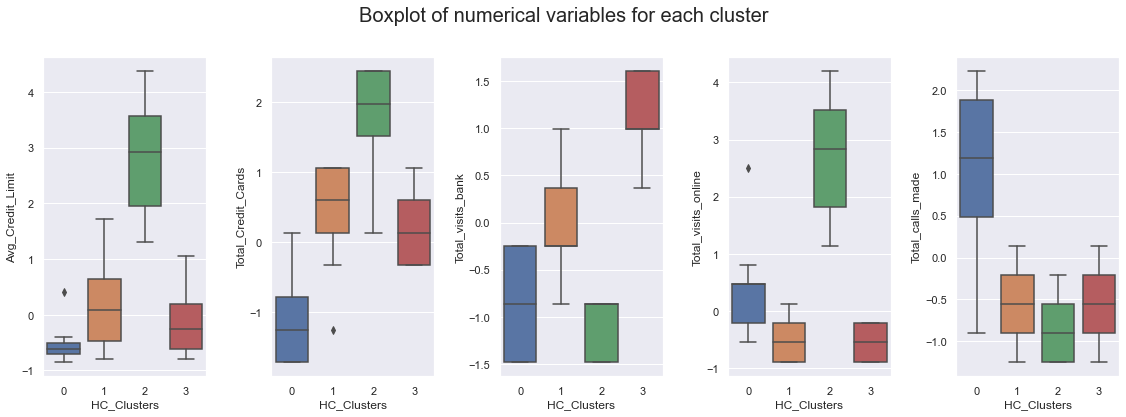

In [281]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml_scaled[all_col[counter]],x=data_ml_scaled['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

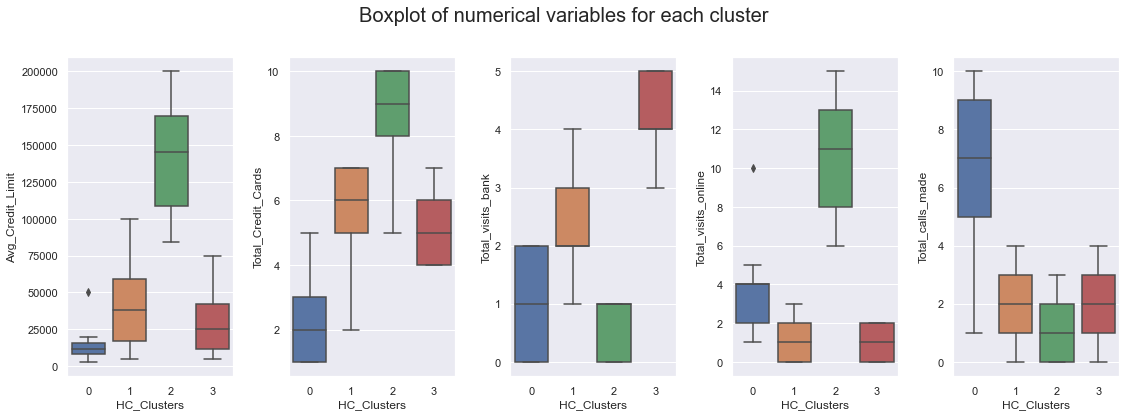

In [282]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_ml[all_col[counter]],x=data_ml['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

In [ ]:
# 4 clusters using euclidean ward provides good separate clusters